
| <h1> Assignment 8.1 </h1> | <h1> Saving Models </h1> |
|--- | --- |
Name: Buan, Danilo Jr. G. <br>
Course and Section: CPE019/CPE32S3 <br>
Date Submitted: 04/13/24 <br>
Instructor: Engr. Roman M. Richard
Date Performed: 04/12/24


#Instructions:

- Choose any dataset applicable to either a classification problem or a regression problem.
- Explain your datasets and the problem being addressed.
- Show evidence that you can do the following:
  - Save a model in HDF5 format
  - Save a model and load the model in a JSON format
  - Save a model and load the model in a YAML format
  - Checkpoint Neural Network Model Improvements
  - Checkpoint Best Neural Network Model only
  - Load a saved Neural Network model
  - Visualize Model Training History in Keras
  - Show the application of Dropout Regularization
  - Show the application of Dropout on the visible layer
  - Show the application of Dropout on the hidden layer
  - Show the application of a time-based learning rate schedule
  - Show the application of a drop-based learning rate schedule
- Submit the link to your Google Colab (make sure that it is accessible to me)

#Classification Problem

The dataset I have chosen is from Kaggle, which is the Heart Disease Dataset and it can be used to solve a classification problem where we can predict whether has a risk of a heart disease or no risk at all, depending on the different features available on this dataset.

Dataset link: https://www.kaggle.com/datasets/yasserh/heart-disease-dataset

In [16]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
import math

In [2]:
heart_df = pd.read_csv("heart.csv")

In [3]:
print(heart_df.shape)
heart_df.sample(5)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [4]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
heart_df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
X = heart_df.drop(labels = ['target'], axis = 1)
y = heart_df['target'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [10]:
model_first  = Sequential([
    Dense(12, input_shape=(13,), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [11]:
model_first.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_first.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
8/8 [==============================] - 2s 38ms/step - loss: 0.8671 - accuracy: 0.5022 - val_loss: 0.8332 - val_accuracy: 0.5263
Epoch 2/200
8/8 [==============================] - 0s 9ms/step - loss: 0.8227 - accuracy: 0.5419 - val_loss: 0.7995 - val_accuracy: 0.5395
Epoch 3/200
8/8 [==============================] - 0s 10ms/step - loss: 0.7896 - accuracy: 0.5419 - val_loss: 0.7668 - val_accuracy: 0.5658
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 0.7577 - accuracy: 0.5771 - val_loss: 0.7360 - val_accuracy: 0.6053
Epoch 5/200
8/8 [==============================] - 0s 6ms/step - loss: 0.7279 - accuracy: 0.5903 - val_loss: 0.7080 - val_accuracy: 0.6447
Epoch 6/200
8/8 [==============================] - 0s 9ms/step - loss: 0.7009 - accuracy: 0.5947 - val_loss: 0.6837 - val_accuracy: 0.6447
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.6779 - accuracy: 0.6652 - val_loss: 0.6561 - val_accuracy: 0.6579
Epoch 8/200
8/8 [========

##1. Save a model in HDF5 format.

In [12]:
model_first.save("model_first.h5")
print("Saved model to disk")

Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

heart_df = pd.read_csv("/content/heart.csv")
# split into input (X) and output (Y) variables
X = heart_df.drop(labels = ['target'], axis = 1)
Y = heart_df['target'].values
# define model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

accuracy: 80.86%
Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
model_first.save('model_first.keras')

Observation: In the first part, I tried the save() function to my original model and saved it as a HDF5 format. In the second cell, I created another base model and saved it as a HDF5 format in one singular cell. On the last cell, I noticed that there was a UserWarning indicating that the way I am saving a model is now considered a legacy, so I tried what the warning recommended.

##2. Save a model and load the model in a JSON format


In [14]:
from tensorflow.keras.models import Sequential, model_from_json
model_first_json = model_first.to_json()
with open("model_first.json", "w") as json_file:
  json_file.write(model_first_json)

In [19]:
json_file = open('model_first.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_first.h5")
print("Loaded model from the disk")

Loaded model from the disk


Observation: For the first cell, this is where I saved my model_first into a json file that was saved to the disk. For my second cell, this is where I loaded the recently saved json file and also we have loaded the weights from my model_first.h5 file to the new model which is the model_first json file.

##3. Save a model and load the model in a YAML format


In [20]:
from tensorflow.keras.models import Sequential, model_from_yaml
model_first_yaml = model_first.to_json()
with open("model_first.yaml", "w") as yaml_file:
  yaml_file.write(model_first_yaml)

model_first.save_weights("model_first_yaml.h5")

In [21]:
yaml_file = open('model_first.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model_first_yaml.h5")
print("Loaded model from disk")

Loaded model from disk


Observation: Same with the previous task, we initially saved the model into a YAML format along with its weights, then we loaded the model_first.yaml

##4. Checkpoint Neural Network Model Improvements


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#checkpoint

filepath = "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

# Fit the model
run_hist_1 = model_first.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200, callbacks=callbacks_list, verbose = 0)



Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to weights-improvement-01-0.75.hdf5

Epoch 2: val_accuracy improved from 0.75000 to 0.77632, saving model to weights-improvement-02-0.78.hdf5

Epoch 3: val_accuracy did not improve from 0.77632


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_accuracy did not improve from 0.77632

Epoch 5: val_accuracy improved from 0.77632 to 0.78947, saving model to weights-improvement-05-0.79.hdf5

Epoch 6: val_accuracy improved from 0.78947 to 0.80263, saving model to weights-improvement-06-0.80.hdf5

Epoch 7: val_accuracy improved from 0.80263 to 0.82895, saving model to weights-improvement-07-0.83.hdf5

Epoch 8: val_accuracy did not improve from 0.82895

Epoch 9: val_accuracy did not improve from 0.82895

Epoch 10: val_accuracy did not improve from 0.82895

Epoch 11: val_accuracy did not improve from 0.82895

Epoch 12: val_accuracy did not improve from 0.82895

Epoch 13: val_accuracy did not improve from 0.82895

Epoch 14: val_accuracy improved from 0.82895 to 0.86842, saving model to weights-improvement-14-0.87.hdf5

Epoch 15: val_accuracy did not improve from 0.86842

Epoch 16: val_accuracy did not improve from 0.86842

Epoch 17: val_accuracy did not improve from 0.86842

Epoch 18: val_accuracy did not improve from 0.8

Observation: For this task, I tried multiple ways in making a checkpoint for my neural network training. Initially, I followed the instructions from the provided notebook, but the results indicated that val_accuracy did not improve from 1.00000 even from the starting epoch. For the second try, it resulted to a val_accuracy that is not improving from 0.0000. Lastly, I tried my inital model_first since I knew that it was working then there it is, improvements were saving in my disk and the val_accuracy was increasing.

##5. Checkpoint Best Neural Network Model only


In [27]:
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

run_hist_1 = model_first.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100, callbacks=callbacks_list, verbose = 0)


Epoch 1: val_accuracy improved from -inf to 0.85526, saving model to weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.85526

Epoch 3: val_accuracy did not improve from 0.85526

Epoch 4: val_accuracy did not improve from 0.85526


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_accuracy did not improve from 0.85526

Epoch 6: val_accuracy did not improve from 0.85526

Epoch 7: val_accuracy did not improve from 0.85526

Epoch 8: val_accuracy did not improve from 0.85526

Epoch 9: val_accuracy did not improve from 0.85526

Epoch 10: val_accuracy did not improve from 0.85526

Epoch 11: val_accuracy did not improve from 0.85526

Epoch 12: val_accuracy did not improve from 0.85526

Epoch 13: val_accuracy did not improve from 0.85526

Epoch 14: val_accuracy did not improve from 0.85526

Epoch 15: val_accuracy did not improve from 0.85526

Epoch 16: val_accuracy did not improve from 0.85526

Epoch 17: val_accuracy did not improve from 0.85526

Epoch 18: val_accuracy did not improve from 0.85526

Epoch 19: val_accuracy did not improve from 0.85526

Epoch 20: val_accuracy did not improve from 0.85526

Epoch 21: val_accuracy did not improve from 0.85526

Epoch 22: val_accuracy did not improve from 0.85526

Epoch 23: val_accuracy did not improve from 0.8552

Observation: From the previous task, I have already learned what to train my data, so this time, I reduced my epochs to lessen any unnecessary epochs line. This time, it only saved one file to my disk.

##6. Load a saved Neural Network model


In [30]:
model_new = Sequential()
model_new.add(Dense(12, input_shape=(13,), activation="relu"))
model_new.add(Dense(1,activation="sigmoid"))

model_new.load_weights("weights.best.hdf5")

model_new.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
print("Created a new model and loaded the best weights from file")

scores = model_new.evaluate(X_train_norm, y_train, verbose = 0)
print("%s: %.2f%%" % (model_new.metrics_names[1], scores[1]*100))

Created a new model and loaded the best weights from file
accuracy: 89.87%


Observation: As I created a new model with a similar architecture to what I have saved, compiled and evaluated it. The new model produced a better performance than the previous ones I have made.

##7. Visualize Model Training History in Keras


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


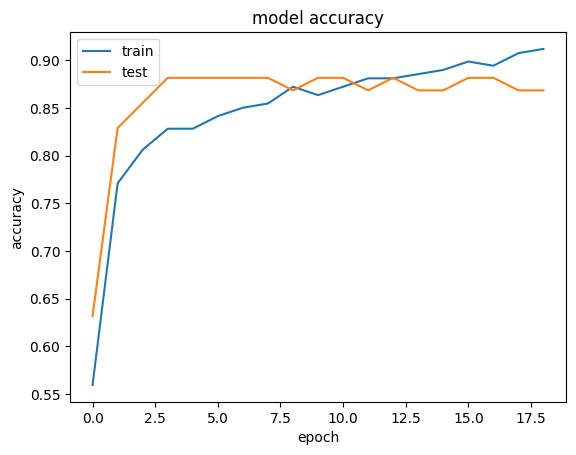

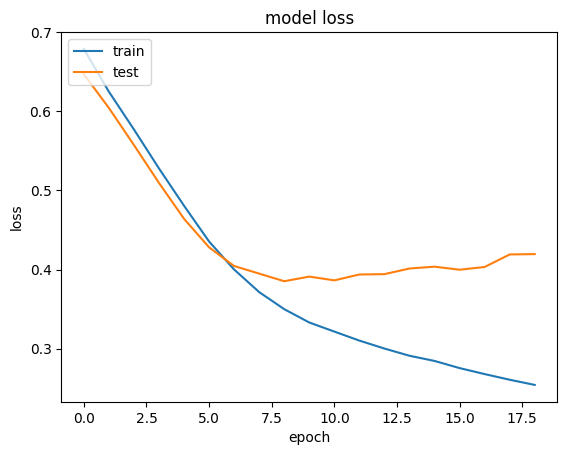

In [20]:
model_first1  = Sequential([
    Dense(128, input_shape=(13,), activation="relu"),
    Dense(64, activation = "relu"),
    Dense(32, activation = "relu"),
    Dense(1, activation="sigmoid")
])

early_stopping = EarlyStopping(monitor= 'val_loss', patience = 10, restore_best_weights = True)

model_first1.compile(SGD(lr = .003), loss = "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_first1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200, batch_size = 5, callbacks=[early_stopping], verbose = 0)

# list all data in history
print(run_hist_1.history.keys())
# summarize history for accuracy
plt.plot(run_hist_1.history['accuracy'])
plt.plot(run_hist_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(run_hist_1.history['loss'])
plt.plot(run_hist_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Observation: I have done some modification where I added a early stopping since the validation loss starts to increase again after a few epochs.

##8. Show the application of Dropout Regularization
##9. Show the application of Dropout on the visible layer
##10. Show the application of Dropout on the hidden layer

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8600 - loss: 0.5030 
Model with dropout - Loss: 0.5003, Accuracy: 0.8684


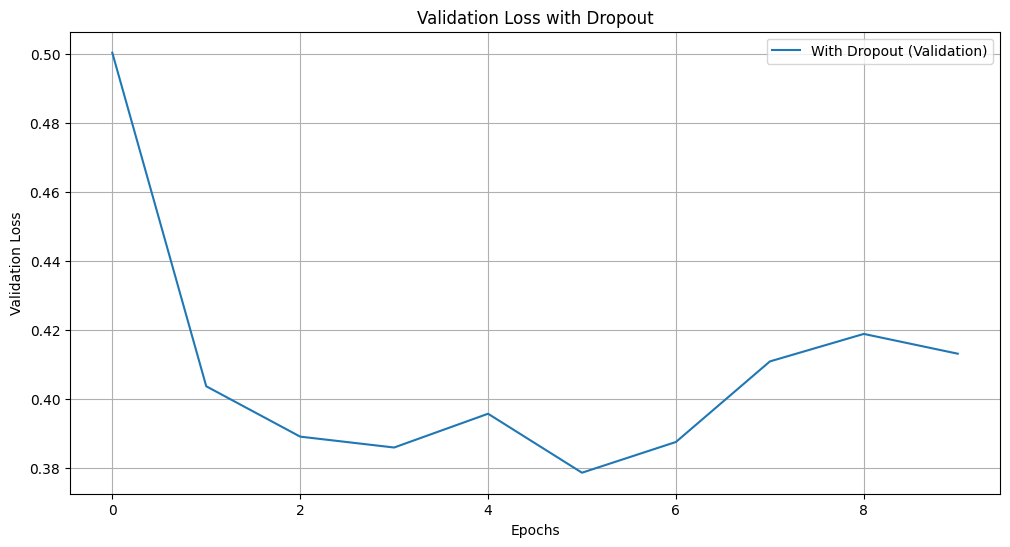

In [21]:
# Train the model with dropout
model_with_dropout = Sequential([
    Dense(128, input_shape=(13,), activation="relu"),
    Dropout(0.3),  # Dropout after the first hidden layer
    Dense(64, activation="relu"),
    Dropout(0.3),  # Dropout after the second hidden layer
    Dense(32, activation="relu"),
    Dropout(0.3),  # Dropout after the third hidden layer
    Dense(1, activation="sigmoid")
])
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_with_dropout = model_with_dropout.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200, batch_size = 5, callbacks=[early_stopping], verbose=0)

# Compare performance metrics
loss_with_dropout, accuracy_with_dropout = model_with_dropout.evaluate(X_test_norm, y_test)
print("Model with dropout - Loss: {:.4f}, Accuracy: {:.4f}".format(loss_with_dropout, accuracy_with_dropout))

# Visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history_with_dropout.history['val_loss'], label='With Dropout (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss with Dropout')
plt.legend()
plt.grid(True)
plt.show()

Observation: As I applied 30% dropout in between all of the layers of my model, I have observed that it contributed to mitigating the overfitting in my neural network as it forces the model to learn more.

##11. Show the application of a time-based learning rate schedule


In [15]:
model_11 = Sequential([
    Dense(128, input_shape=(13,), activation="relu"),
    #Dropout(0.3),  # Dropout after the first hidden layer
    Dense(64, activation="relu"),
    #Dropout(0.3),  # Dropout after the second hidden layer
    Dense(32, activation="relu"),
    #Dropout(0.3),  # Dropout after the third hidden layer
    Dense(1, activation="sigmoid")
])
epochs = 100
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

early_stopping = EarlyStopping(monitor= 'val_loss', patience = 10, restore_best_weights = True)

sgd = SGD(learning_rate = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

model_11.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history_11 = model_11.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=epochs, batch_size = 5, callbacks=[early_stopping], verbose=1)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6137 - loss: 0.6365 - val_accuracy: 0.8684 - val_loss: 0.4421
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8188 - loss: 0.4208 - val_accuracy: 0.8553 - val_loss: 0.3691
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8672 - loss: 0.3341 - val_accuracy: 0.8553 - val_loss: 0.3820
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8538 - loss: 0.3201 - val_accuracy: 0.8684 - val_loss: 0.4037
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8376 - loss: 0.2795 - val_accuracy: 0.8553 - val_loss: 0.4246
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9151 - loss: 0.2012 - val_accuracy: 0.8553 - val_loss: 0.4400
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9177 - loss: 0.2074 - val_accuracy: 0.8684 - val_loss: 0.4486
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9527 - loss: 0.1822 - val_accuracy: 0.8816 - 

Observation: After applying a time-based learning rate schedule, I have observed that the learning rate starts at 0.01 and progressively decreases over the course of training due to the specified decay rate.

##12. Show the application of a drop-based learning rate schedule

In [19]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

model_12 = Sequential([
    Dense(128, input_shape=(13,), activation="relu"),
    #Dropout(0.3),  # Dropout after the first hidden layer
    Dense(64, activation="relu"),
    #Dropout(0.3),  # Dropout after the second hidden layer
    Dense(32, activation="relu"),
    #Dropout(0.3),  # Dropout after the third hidden layer
    Dense(1, activation="sigmoid")
])

early_stopping = EarlyStopping(monitor= 'val_loss', patience = 10, restore_best_weights = True)

sgd = SGD(learning_rate = 0.0, momentum = 0.9)

model_12.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

history_11 = model_12.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=epochs, batch_size = 5, callbacks=callbacks_list, verbose=2)

Epoch 1/100
46/46 - 3s - 73ms/step - accuracy: 0.7004 - loss: 0.5538 - val_accuracy: 0.7632 - val_loss: 0.5929 - learning_rate: 0.1000
Epoch 2/100
46/46 - 0s - 3ms/step - accuracy: 0.7621 - loss: 0.5069 - val_accuracy: 0.8816 - val_loss: 0.7530 - learning_rate: 0.1000
Epoch 3/100
46/46 - 0s - 9ms/step - accuracy: 0.7313 - loss: 0.6292 - val_accuracy: 0.8289 - val_loss: 0.4670 - learning_rate: 0.1000
Epoch 4/100
46/46 - 0s - 5ms/step - accuracy: 0.7533 - loss: 0.5276 - val_accuracy: 0.7237 - val_loss: 0.5156 - learning_rate: 0.1000
Epoch 5/100
46/46 - 0s - 5ms/step - accuracy: 0.7004 - loss: 0.5923 - val_accuracy: 0.8158 - val_loss: 0.4757 - learning_rate: 0.1000
Epoch 6/100
46/46 - 0s - 6ms/step - accuracy: 0.7797 - loss: 0.5652 - val_accuracy: 0.8158 - val_loss: 0.7474 - learning_rate: 0.1000
Epoch 7/100
46/46 - 0s - 7ms/step - accuracy: 0.7313 - loss: 0.5820 - val_accuracy: 0.7763 - val_loss: 0.5833 - learning_rate: 0.1000
Epoch 8/100
46/46 - 0s - 6ms/step - accuracy: 0.7577 - loss: 

Observation: After applying a drop-based learning rate schedule, I have observed that the learning rate initializes at 0.1 and halved every 10 epochs because of the drop factor. This helped the model gradually refine its weights, potentially leading to smoother convergence and impoved generalization.

#Conclusion

- After performing this activity, I have learned various techniques for saving, loading, and optimizing neural network models. In conclusion, these observations highlight the importance of understanding different strategies for model management, including saving models in different formats such as HDF5, JSON, and YAML, implementing checkpoints for model training to track progress effectively, and utilizing techniques like early stopping, dropout regularization, and time-based or drop-based learning rate schedules to enhance model performance, prevent overfitting, and achieve smoother convergence.